In [147]:
#This is a script that will show the data provided by Frankie wilson on the number of people entering the libraries
#There are 4 data sets: RADCAMTermTimeFinal, OLDBODTermTimeFinal, RADCAMvacationFinal, OLDBODvacationFinal
import os
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime
import seaborn as sns
from scipy.optimize import curve_fit

In [148]:
#import the library occupancy data
df = pd.read_csv("C:\\Users\\Student\\Documents\\3YP\\Building efficiency\\zoningdata\\OLDBODTermTimeFinal.csv",)

df['DateTime'] = pd.to_datetime(df[['Day','Month','Year','Hour']],format='%d/%m/%Y %H')#ensure datetime is enabled
df.set_index('DateTime') #set the dates as the index


Year  Month  Day  Hour  Count
DateTime                                          
2018-10-07 17:00:00  2018     10    7    17      9
2018-10-07 16:00:00  2018     10    7    16     17
2018-10-07 15:00:00  2018     10    7    15     54
2018-10-07 14:00:00  2018     10    7    14     83
2018-10-07 13:00:00  2018     10    7    13     70
...                   ...    ...  ...   ...    ...
2019-06-23 14:00:00  2019      6   23    14     55
2019-06-23 13:00:00  2019      6   23    13     75
2019-06-23 12:00:00  2019      6   23    12     75
2019-06-23 11:00:00  2019      6   23    11      4
2019-06-23 10:00:00  2019      6   23    10     11

[2993 rows x 5 columns]

In [149]:
#add columns with different date information
df['Month'] = df['DateTime'].dt.month_name()
df['Day'] = df['DateTime'].dt.day_name()
df['Date']=df['DateTime'].dt.date
df['Hour']=df['DateTime'].dt.hour
del df["DateTime"]
del df["Year"]

#df1=df.loc[(df['Hour']>7.9)]
#df2=df1.loc[(df1['Hour'])<21.1]
#df3 = df2.groupby(['Day', 'Hour'],sort=False).agg('mean')
#print(df1)
#df3.to_csv('Averagehourlycounts')

df1=df.groupby(['Day', 'Hour']).mean()
print(df1)
df1.to_csv('AverageHourlyCountsOLDBODTermTime')
#df1.to_excel("AverageHourlyCounts")

                    Count
Day       Hour           
Friday    0      1.000000
          1      1.000000
          2      1.000000
          3      1.000000
          4      1.500000
...                   ...
Wednesday 19    40.535714
          20    21.541667
          21    10.625000
          22     2.173913
          23     4.000000

[158 rows x 1 columns]


Text(0.5, 1.0, 'Readers Entering Term Time')

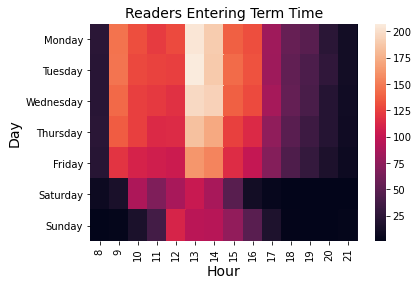

In [152]:
heatmap = pd.pivot_table(df1, values='Count', index=['Day'], columns='Hour')

a = heatmap.index.values

#To order days of the week
rows = list(a)
rows.insert(0, rows.pop(rows.index('Monday')))
rows.insert(1, rows.pop(rows.index('Tuesday')))
rows.insert(2, rows.pop(rows.index('Wednesday')))
rows.insert(3, rows.pop(rows.index('Thursday')))
rows.insert(4, rows.pop(rows.index('Friday')))
rows.insert(5, rows.pop(rows.index('Saturday')))
heatmap = heatmap.loc[rows, :]

sns.heatmap(heatmap)
plt.xlim([8,22])
plt.xlabel("Hour", size=14)
plt.ylabel("Day", size=14)
plt.title("Readers Entering Term Time", size=14)